# Proyecto. Aprendizaje de Maquina

David Sequera

## Explore Data

### Import Libraries

In [44]:
import numpy as np
import pandas as pd


# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
# from mlxtend.feature_selection import SequentialFeatureSelector

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


# Metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

### Import Data


In [45]:
path = 'data/clean_dataset.csv'

In [46]:
df = pd.read_csv(path)

In [47]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [48]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [49]:
X = df.values
y = df['Approved'].values
X = X[:,1:]
print('X: ' + str(X.shape))
print('y: ' + str(y.shape))

X: (690, 15)
y: (690,)


### Visualize Data

<Axes: xlabel='label', ylabel='count'>

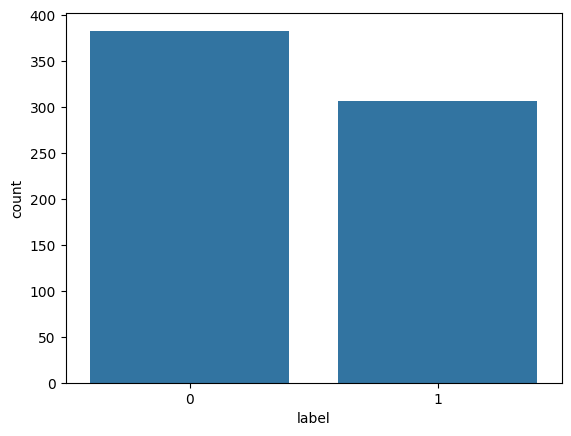

In [50]:
sns.countplot(data=pd.DataFrame(y, columns=['label']), x='label')

<Axes: xlabel='Approved', ylabel='count'>

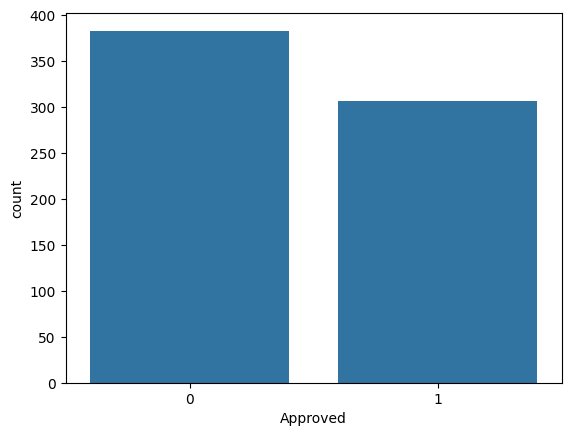

In [51]:
sns.countplot(data=df, x='Approved')

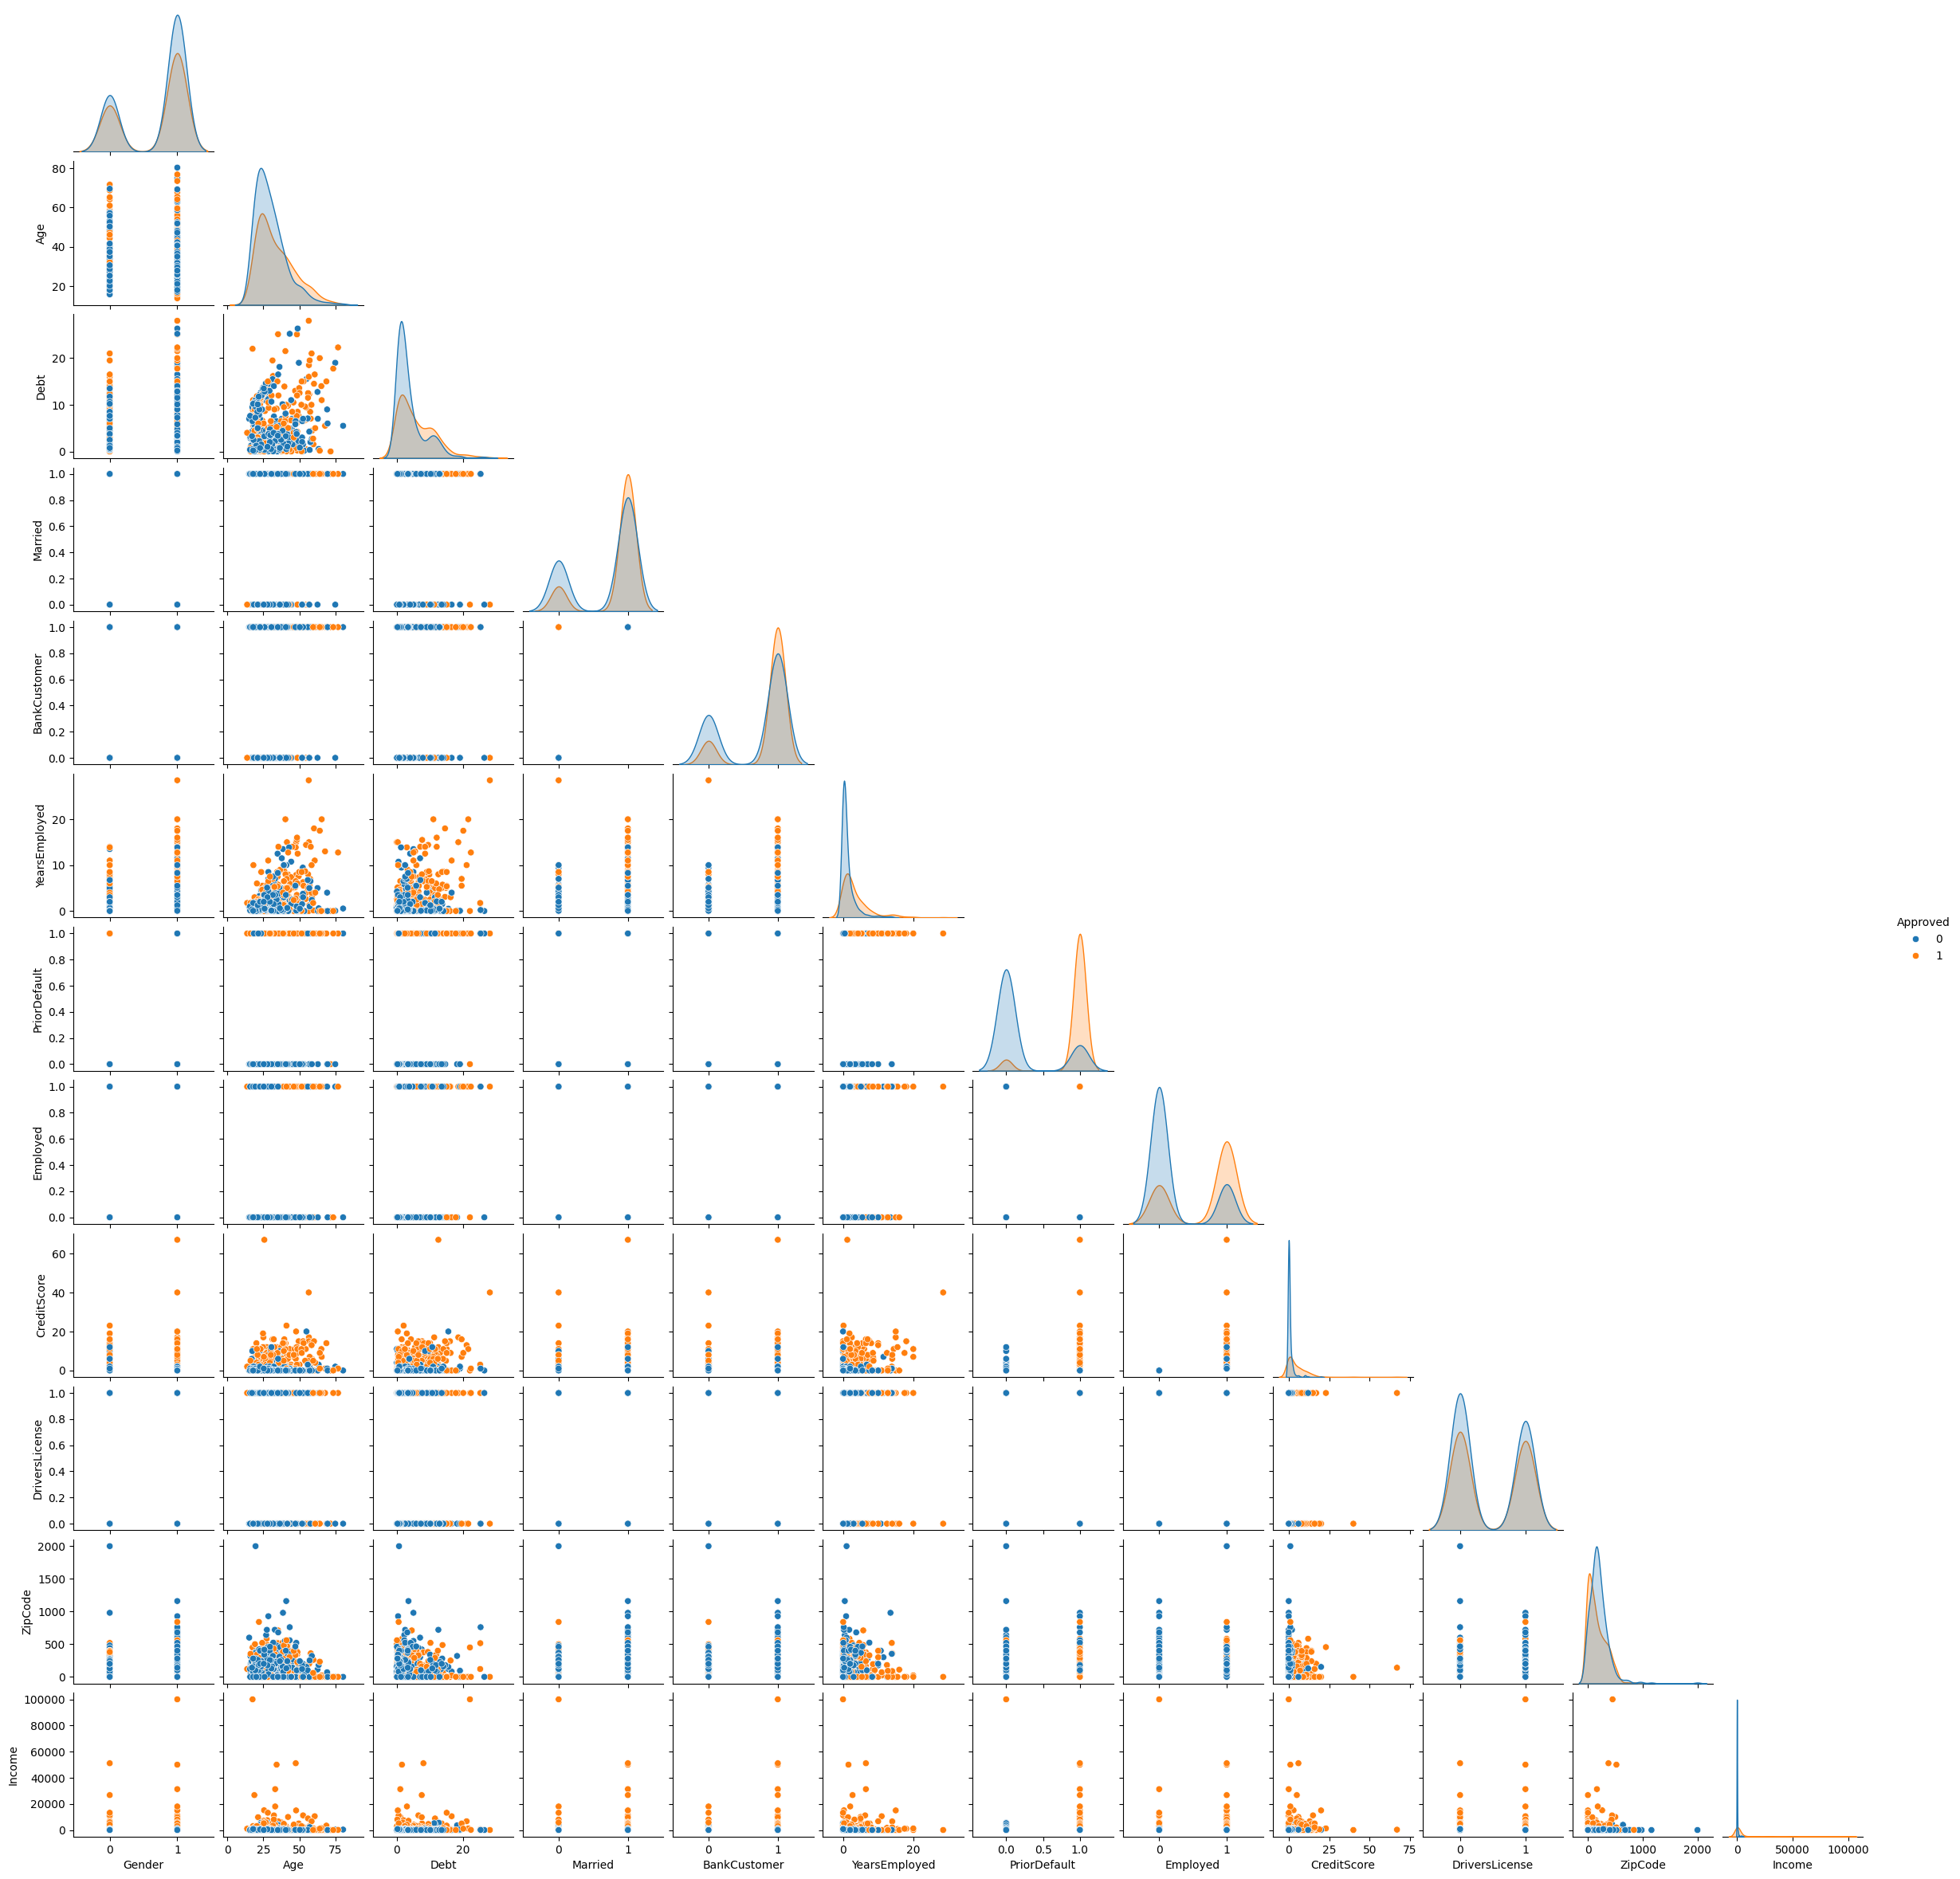

In [103]:
# Visualización de los datos
sns.pairplot(df, hue='Approved', height=2, corner=True)

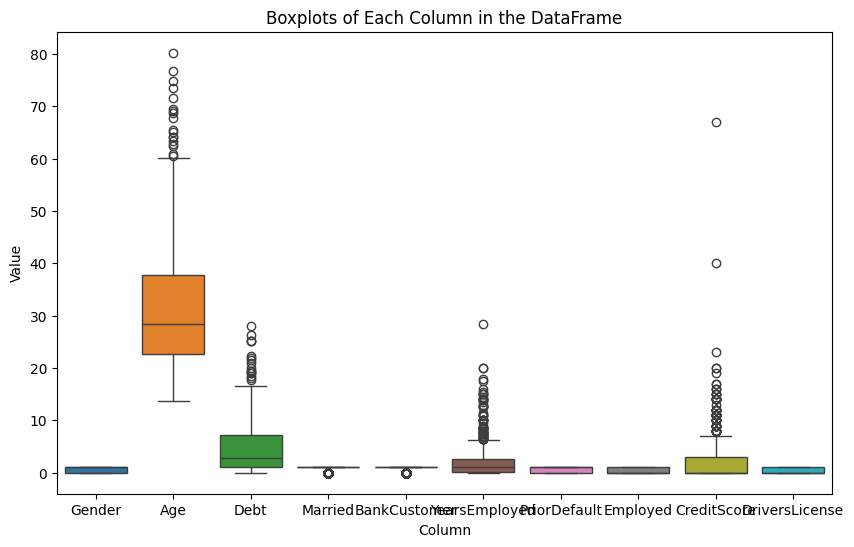

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(['Approved', 'Income', 'ZipCode'], axis=1))
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Boxplots of Each Column in the DataFrame')
plt.show()

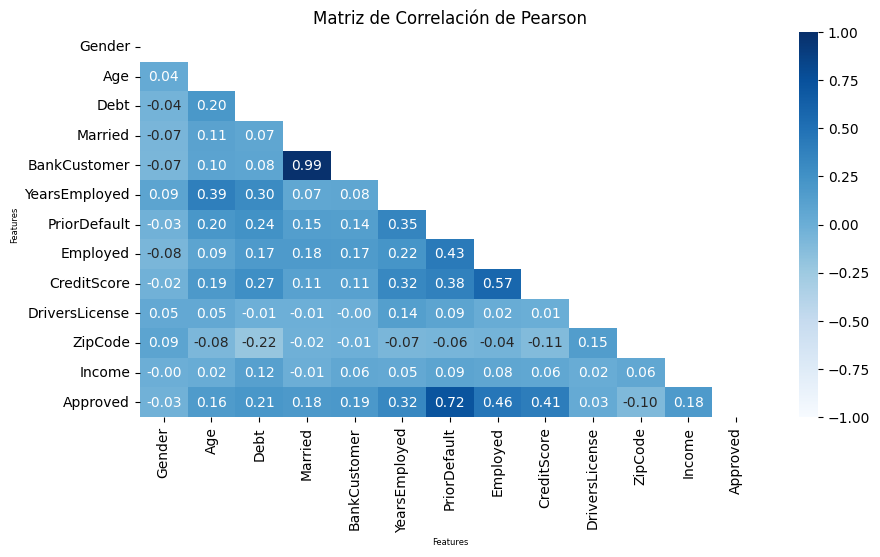

In [63]:
# Get the correlation matrix
corr = df.corr(numeric_only=True)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

#  Corner
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Create a heatmap using seaborn
sns.heatmap(corr, annot=True, cmap=plt.colormaps['Blues'], fmt=".2f", ax=ax,mask=dropSelf, vmin=-1, vmax=1)

# Add labels
ax.set_xlabel('Features', fontsize=6)
ax.set_ylabel('Features', fontsize=6)

# Rotate tick labels
plt.xticks(rotation=90)
plt.title("Matriz de Correlación de Pearson")
plt.show()

## Prepare Data


se intento esntandarizar los datos, estos ya se encuentran en la misma escala ya que cada columna representa la luminosidad de un pixel por lo que tienen el mismo rango sin embargo puede cambie su varianza. Despues de experimentar con estandarizacion PCA empeora

In [54]:
train_data = df.drop(['Approved', 'Ethnicity', 'Industry', 'Citizen'], axis=1).values
# scaler = StandardScaler().fit(train_data)
# train_data = scaler.transform(train_data)

Se realizo un PCA para reducir la dimensionalidad de los datos y encontrar quizas algun patron, sin embargo los datos casi no se pueden reducir a un espacio visible, aproximadamente se vuelve buena la reduccion a partir de los 7 componentes

In [55]:
pca = PCA(n_components=4)
embed = pca.fit_transform(train_data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.98882807e-01 1.10988835e-03 5.28481583e-06 1.03955453e-06]
[136759.25975887   4558.68010966    314.56789841    139.51570914]


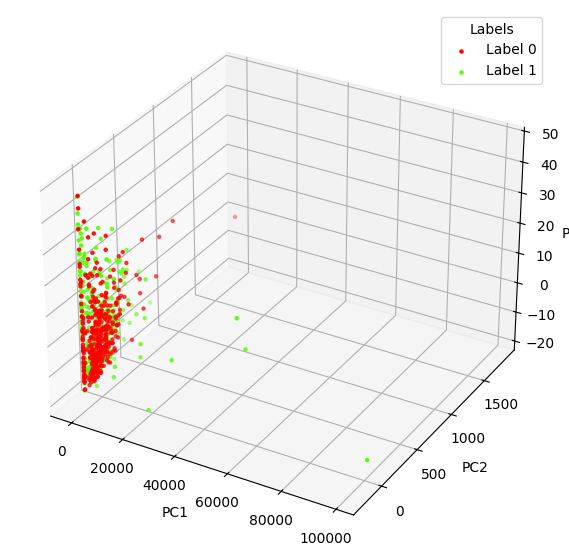

In [56]:
# Define unique labels and colors
unique_labels = np.unique(y)
colors = plt.cm.prism(np.linspace(0, 1, len(unique_labels)))

# Create a figure and a 3D axis
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot each label separately
for label, color in zip(unique_labels, colors):
    indices = y == label
    ax.scatter(embed[indices, 0], embed[indices, 1], embed[indices, 2], 
               c=color.reshape(1, -1), label=f'Label {label}', s=5)

# Set axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add a legend
ax.legend(title='Labels')

# Show plot
plt.show()

In [57]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Assuming embed and y are your data arrays
# embed is a 2D numpy array with shape (n_samples, 3)
# y is a 1D numpy array with shape (n_samples,)

# Define unique labels
unique_labels = np.unique(y)

# Define colors for each label
colors = px.colors.qualitative.Plotly[:len(unique_labels)]

# Create a scatter plot for each label
fig = go.Figure()

for label, color in zip(unique_labels, colors):
    indices = y == label
    fig.add_trace(go.Scatter3d(
        x=embed[indices, 0],
        y=embed[indices, 1],
        z=embed[indices, 2],
        mode='markers',
        marker=dict(size=2, color=color),
        name=f'Label {label}'
    ))

# Update axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend_title='Labels'
)

# Show plot
fig.show()


### Transform Data

## Model

### Train

In [58]:
lr = LogisticRegression()
print(lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [59]:
y = y.astype(int)

In [60]:
lr.fit(train_data, y)

d:\Projects\Mini\AI\don_armando\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [64]:
lr.score(train_data, y)

0.8565217391304348

### Predict

In [66]:
y_pred = lr.predict(train_data)

In [90]:
y_pred.shape

(690,)

## Evaluation

### Balance outlayers prediction

Como se trata de aprendizaje no supervisado se busca alguna medida que optimizar, en esta caso asumiendo que los outlayers serian una minoria se busca medir este desbalance

In [89]:
y.shape

(690,)

Text(0, 0.5, 'Count')

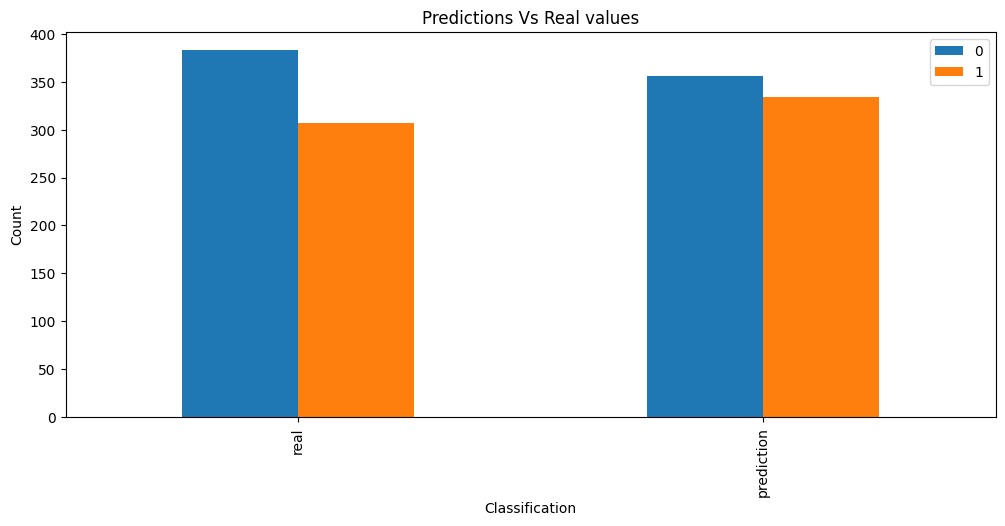

In [101]:
pd.DataFrame({
    "0":(np.count_nonzero(y == 0), np.count_nonzero(y_pred == 0)),
    "1":(np.count_nonzero(y == 1), np.count_nonzero(y_pred == 1))},
    index=["real", "prediction"]).plot(kind="bar",figsize=(12, 5))
plt.title("Predictions Vs Real values")
plt.xlabel("Classification")
plt.ylabel("Count")

### Metrics

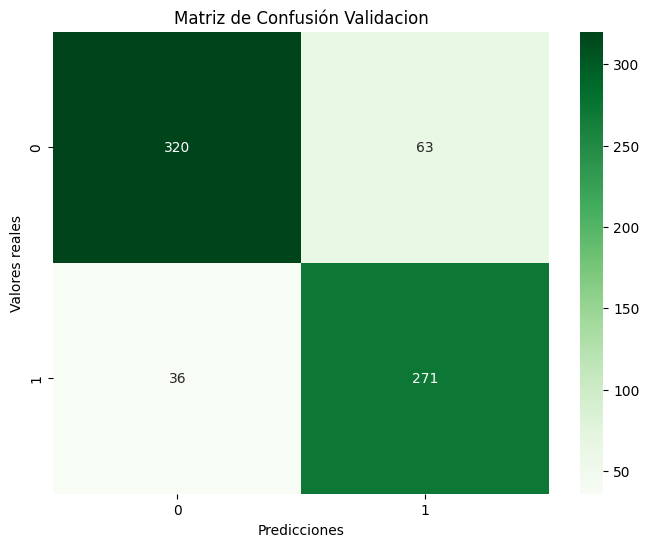

In [69]:
conf_matrix = confusion_matrix(y, lr.predict(train_data).round())

# Visualizar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión Validacion')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [70]:
# Generate the classification report
report = classification_report(y, lr.predict(train_data).round())

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.90      0.84      0.87       383
           1       0.81      0.88      0.85       307

    accuracy                           0.86       690
   macro avg       0.86      0.86      0.86       690
weighted avg       0.86      0.86      0.86       690



## Export Model

In [104]:
import joblib

# Export the model
joblib.dump(lr, 'model/model.pkl')

['model/model.pkl']

In [110]:
# import sklearn.externals.joblib as skljoblib

# Load the model
model = joblib.load('model/model.pkl')

In [ ]:
y_model = model.predict(train_data)

In [ ]:
conf_matrix = confusion_matrix(y, lr.predict(train_data).round())

# Visualizar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión Validacion')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()